In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import re

In [2]:
#https://www.kaggle.com/aipi12/top-4-approach-with-randomforest

In [3]:
#Importing datasets
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [4]:
print(train_df.columns.values)
train_df.head(5)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
y_train = train_df['Survived']

In [9]:
x_test = test_df

In [10]:
x_train = train_df

In [11]:
x_train[x_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=x_train, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=x_test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

plt.show()

C:\Users\00136485\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1600x1200 with 2 Axes>

In [13]:
## Replacing the null values in the Embarked column with the mode. 
x_train.Embarked.fillna("C", inplace=True)

In [14]:
full_data = [x_train, x_test]

In [15]:
# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [16]:
for dataset in full_data:
    dataset['Has_Cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(x_train['Fare'].median())

In [17]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

C:\Users\00136485\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [19]:
for dataset in full_data:
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [20]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1}).astype(int)

In [21]:
for dataset in full_data:
    # Mapping Name length
    dataset['Name_length'] = dataset['Name'].apply(len)

In [22]:
for dataset in full_data:
    # Seperating Ticket Numbers and Letters
    dataset['TicketNumbers'] = dataset.Ticket.apply(lambda x:int(x) if x.isnumeric() else 0 if x == 'LINE' else int(x.split(' ')[-1]))
    dataset['TicketLetters'] = dataset.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.', '').replace('/', '').lower()  if len(x.split(' ')[:-1]) > 0 else x.lower() if x == 'LINE' else 'none')

In [23]:
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_Cabin,Title,Name_length,TicketNumbers,TicketLetters
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,NaN,2,1,1,0,1,16,330911,none
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,NaN,0,2,0,0,3,32,363272,none
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,NaN,2,1,1,0,1,25,240276,none
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,NaN,0,1,1,0,1,16,315154,none
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12.2875,NaN,0,3,0,0,3,44,3101298,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,38,0,0,A.5. 3236,8.0500,NaN,0,1,1,0,1,18,3236,a5
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108.9000,C105,1,1,1,1,5,28,17758,pc
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,1,1,0,1,28,3101262,sotonoq
416,1308,3,"Ware, Mr. Frederick",1,29,0,0,359309,8.0500,NaN,0,1,1,0,1,19,359309,none


In [24]:
test_id = x_test['PassengerId']

In [25]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin']
for dataset in full_data:
    dataset.drop(drop_elements, axis = 1, inplace = True)
    

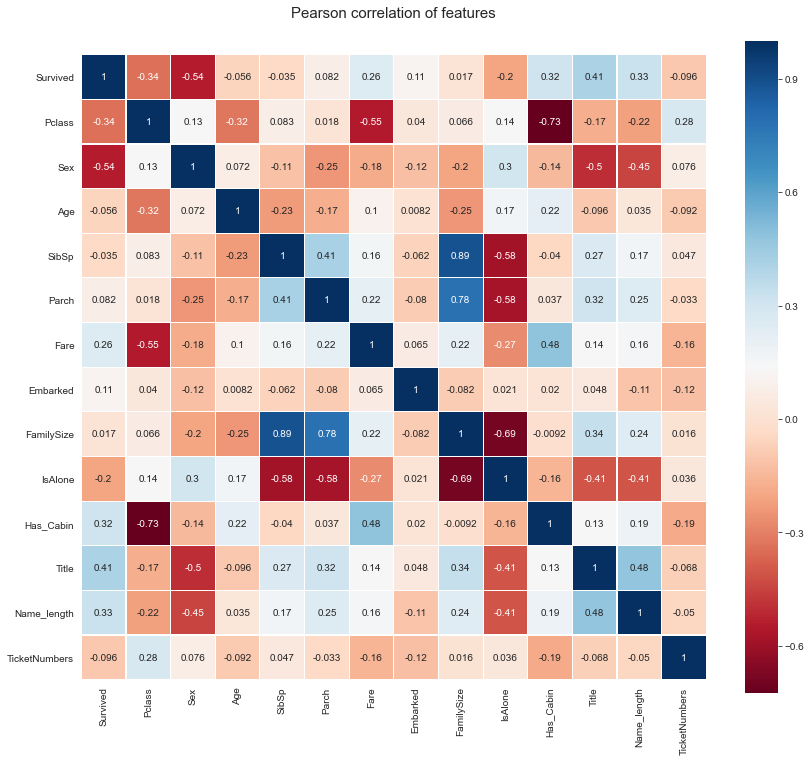

In [26]:
x_train_plot = x_train.drop('TicketLetters', axis = 1)
colormap = plt.cm.RdBu
plt.figure(figsize = (14, 12))
plt.title('Pearson correlation of features', y = 1.05, size = 15)
sns.heatmap(x_train_plot.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True)

In [27]:
train_test_cleaning = pd.concat([x_train, x_test], keys = ['train', 'test'], axis = 0)
train_test_cleaning

Survived  Pclass  Sex  Age  SibSp  Parch      Fare  Embarked  \
train 0         0.0       3    1   22      1      0    7.2500         0   
      1         1.0       1    0   38      1      0   71.2833         1   
      2         1.0       3    0   26      0      0    7.9250         0   
      3         1.0       1    0   35      1      0   53.1000         0   
      4         0.0       3    1   35      0      0    8.0500         0   
...             ...     ...  ...  ...    ...    ...       ...       ...   
test  413       NaN       3    1   38      0      0    8.0500         0   
      414       NaN       1    0   39      0      0  108.9000         1   
      415       NaN       3    1   38      0      0    7.2500         0   
      416       NaN       3    1   29      0      0    8.0500         0   
      417       NaN       3    1   27      1      1   22.3583         1   

           FamilySize  IsAlone  Has_Cabin  Title  Name_length  TicketNumbers  \
train 0             2        0          0      1           23          21171   
      1             2        0          1      3           51          17599   
      2             1        1          0      2           22        3101282   
      3             2        0          1      3           44         113803   
      4             1        1          0      1           24         373450   
...               ...      ...        ...    ...          ...            ...   
test  413           1        1          0      1           18           3236   
      414           1        1          1      5           28          17758   
      415           1        1          0      1           28        3101262   
      416           1        1          0      1           19         359309   
      417           3        0          0      4           24           2668   

          TicketLetters  
train 0              a5  
      1              pc  
      2          stono2  
      3            none  
      4            none  
...                 ...  
test  413            a5  
      414            pc  
      415       sotonoq  
      416          none  
      417          none  

[1309 rows x 15 columns]

In [28]:
train_test_cleaning = pd.get_dummies(train_test_cleaning)


In [29]:
train_test_cleaning.drop('Survived', axis = 1, inplace = True)

In [30]:
x_train = train_test_cleaning.loc['train']
x_test = train_test_cleaning.loc['test']

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30)
clf = clf.fit(x_train, y_train)

In [32]:
clf.score(x_train, y_train)

1.0

In [33]:
prediction = clf.predict(x_test)

In [34]:
solution = pd.DataFrame({'PassengerId': test_id, 'Survived': prediction})

In [35]:
solution.to_csv('solution_1', index = False)

In [36]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.model_selection import GridSearchCV

In [37]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
svc = make_pipeline(StandardScaler(), SVC(probability = True))
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
exttree = ExtraTreesClassifier(random_state=1)


estimators = [lr, dt, rf, svc, knn, exttree]
labels = ['Linear Regression', 
            'Decision Tree', 
            'Random Forest Classifier', 
            'SVC', 
            'k Nearest Neighbour',
            'Extra Tree Classifier']

In [38]:
def estimate(x_train, y_train, estimators, labels):
    df_result = pd.DataFrame()
    
    row_index = 0
    for est, est_name in zip(estimators, labels):
        cv_results = cross_validate(est, x_train, y_train, n_jobs = -1, cv = 10)
        df_result.loc[row_index, 'Model name'] = est_name
        df_result.loc[row_index, 'Test_accuracy'] = cv_results['test_score'].mean()
        df_result.loc[row_index, 'Standard Deviation'] = cv_results['test_score'].std()
        df_result.loc[row_index, 'Fit_time'] = cv_results['fit_time'].mean()
        
        row_index +=1
        
    df_result.sort_values(by=['Test_accuracy'], ascending = False, inplace = True, ignore_index = True)
    
    return df_result

In [39]:
estimate(x_train, y_train, estimators, labels)

,Model name,Test_accuracy,Standard Deviation,Fit_time
0,Random Forest Classifier,0.841798,0.032052,0.266187
1,Extra Tree Classifier,0.831698,0.032244,0.255516
2,SVC,0.823820,0.036446,0.212637
3,k Nearest Neighbour,0.802547,0.032380,0.015059
4,Decision Tree,0.777803,0.040602,0.008875
5,Linear Regression,0.634157,0.040171,0.026232


In [306]:
rf_params = {'random_state': [1],
             'max_depth': [16],
             'max_features': [19, 20, 21],
             'min_samples_leaf': [1,2],
             'min_samples_split': [4, 5, 6],
             'n_estimators': [42,43,44]}

grid = GridSearchCV(rf, 
                    rf_params,
                    cv = 10,   
                    n_jobs = -1)

grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                  

In [307]:
grid.best_params_

{'max_depth': 16,
 'max_features': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 43,
 'random_state': 1}

In [309]:
rf = RandomForestClassifier(**grid.best_params_)

cv_results = cross_val_score(rf, x_train, y_train, n_jobs = -1, cv = 10)

In [310]:
print(f'All results: {cv_results} \n\n' +
      f'Mean: {cv_results.mean()} \n\n' +
      f'Std: {cv_results.std()}')

All results: [0.82222222 0.88764045 0.78651685 0.86516854 0.91011236 0.87640449
 0.85393258 0.83146067 0.91011236 0.85393258] 

Mean: 0.8597503121098626 

Std: 0.037143966987251864


In [311]:
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)

In [312]:
submission = pd.DataFrame({'PassengerId': test_id,
                           'Survived': predictions})
submission.to_csv('submission_2.csv', index = False)